# Mini Project 2
<div dir=rtl>

## محمدمهدی معاضدی
## پرسش اول
## 99304**73**
از انجا که شماره دانشجویی اینجانب 9930473 می باشد برای Random State را برابر با دو رقم آخر شمارۀ دانشجویی خود در یعنی 73 درنظر میگیریم.
</div>

In [ ]:
# Imports
import math
import torch
from torch.nn.parameter import Parameter
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
from math import sqrt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.cluster import k_means
from einops import repeat
import matplotlib.pyplot as plt
from typing import Literal


<div dir=rtl>

# پرسش اول
به کمک یک نورون ساده یا پرسپترون یا نورون شبکه ای طراحی کنید که بتواند ناحیۀ هاشورزدۀ داخل مثلثی که در نمودار نشان داده شده را از سایر نواحی تفکیک کند. پس از انجام مرحلۀ طراحی شبکه (که می تواند به صورت دستی انجام شود)، برنامه ای که در این [دفترچه کد](https://colab.research.google.com/drive/1Jhlt-gYzQSU4PHNkoRk7zM89JVZzVz_2?usp=sharing) و در کلاس برای نورون آموخته اید را به گونه ای توسعه دهید که ۲۰۰۰ نقطۀ رندوم تولید کند و آن ها را به عنوان ورودی به شبکۀ طراحی شده توسط شما دهد و نقاطی که خروجی «۱» تولید می کنند را با رنگ سبز و نقاطی که خروجی ۰تولید می کنند را با رنگ قرمز نشان دهد.

</div>

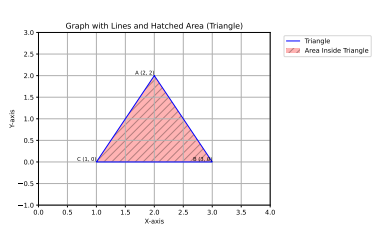

## 1.3 writing my own McCulloch-Pitts Class

My McCulloch-Pitts Class offers an advantage over the provided notebook by allowing for adjustable activation functions. This is achieved by accepting the desired activation function as a string, which is then treated as an attribute within the class

In [ ]:
def relu(x):
  return x if x>0 else 0

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sign(x):
  return 1 if x>0 else 0

def elu(x):
  alpha =1
  if x>=0:
    return x
  else:
    return alpha *(math.exp(x)-1)

class my_McCulloch_Pitts():
    def __init__(self, weights, threshold,activation = Literal[relu,elu,sigmoid,sign]):
        self.weights = weights
        self.threshold = threshold
        self.activation=activation


    def model(self, x):
        # Compute weighted sum
        weighted_sum = self.weights @ x
        # Apply activation
        return self.activation(weighted_sum - self.threshold)

In [ ]:
def network(x, y,activation = Literal[relu,elu,sigmoid,sign]):
    neur1 = my_McCulloch_Pitts([0, 1], 0, sign)
    neur2 = my_McCulloch_Pitts([2, -1], 2, sign)
    neur3 = my_McCulloch_Pitts([-2, -1], -6, sign)

    if activation == relu or activation == elu :
        neur4 = my_McCulloch_Pitts([1, 1, 1], 2.4999, activation)
    else:
        neur4 = my_McCulloch_Pitts([1, 1, 1], 2.9999, activation)




    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur4.model(np.array([z1, z2, z3]))

    # 3 bit output
    # return str(z1) + str(z2)
    return list([z4])


Plotting for Activation Function: ReLU


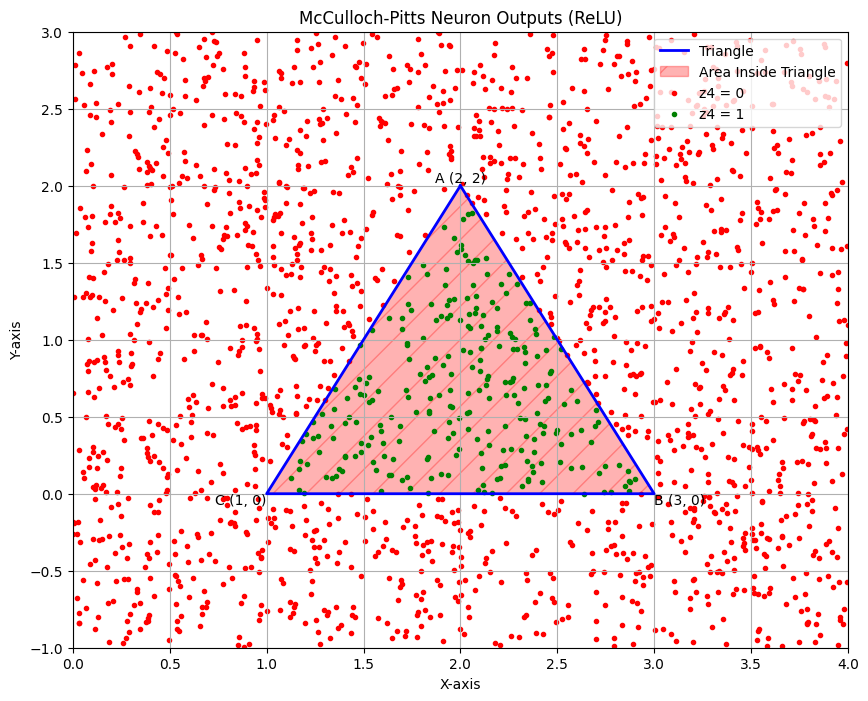

Plotting for Activation Function: ELU


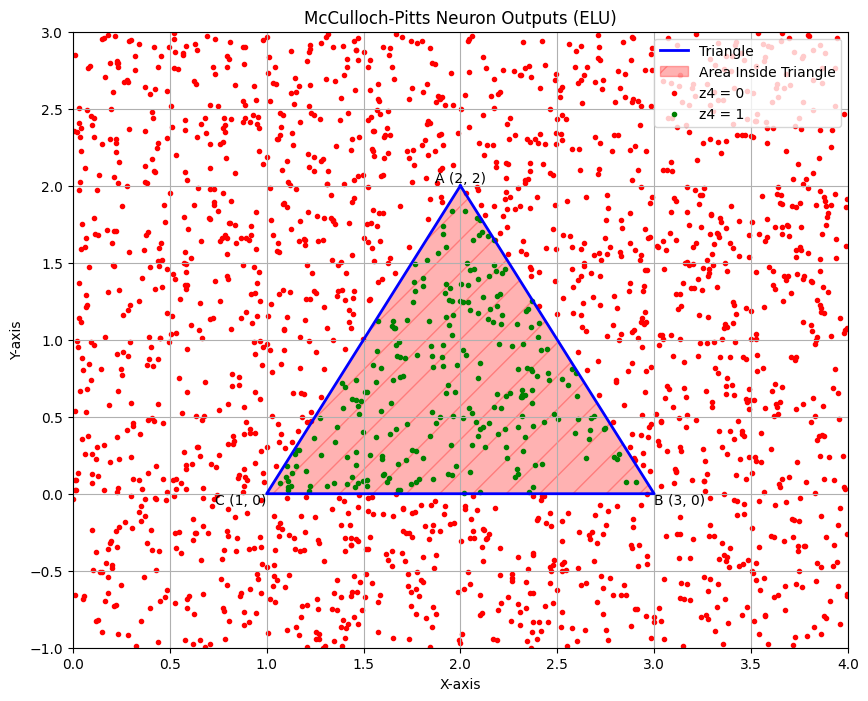

Plotting for Activation Function: Sigmoid


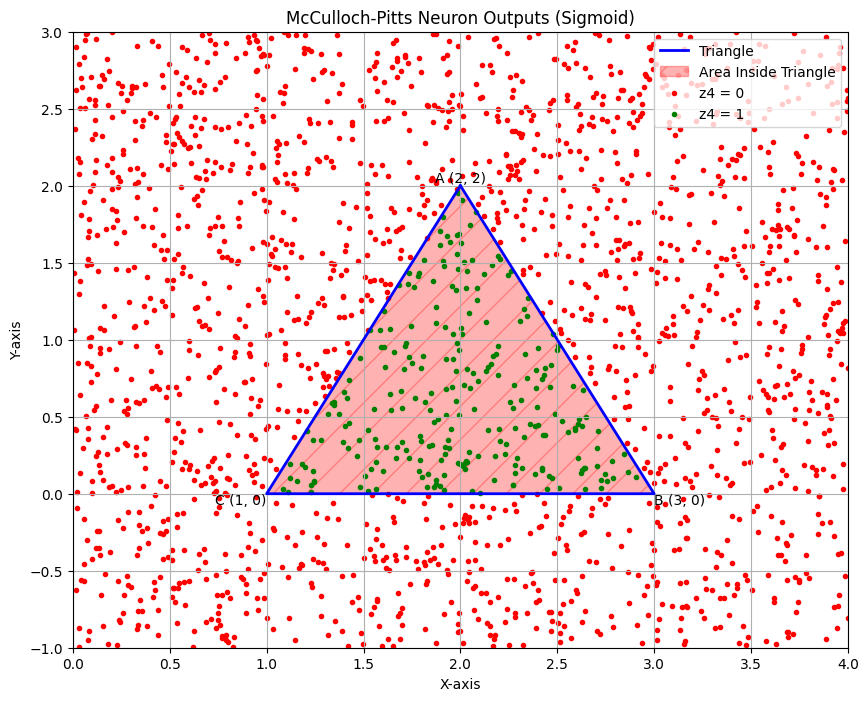

Plotting for Activation Function: Sign


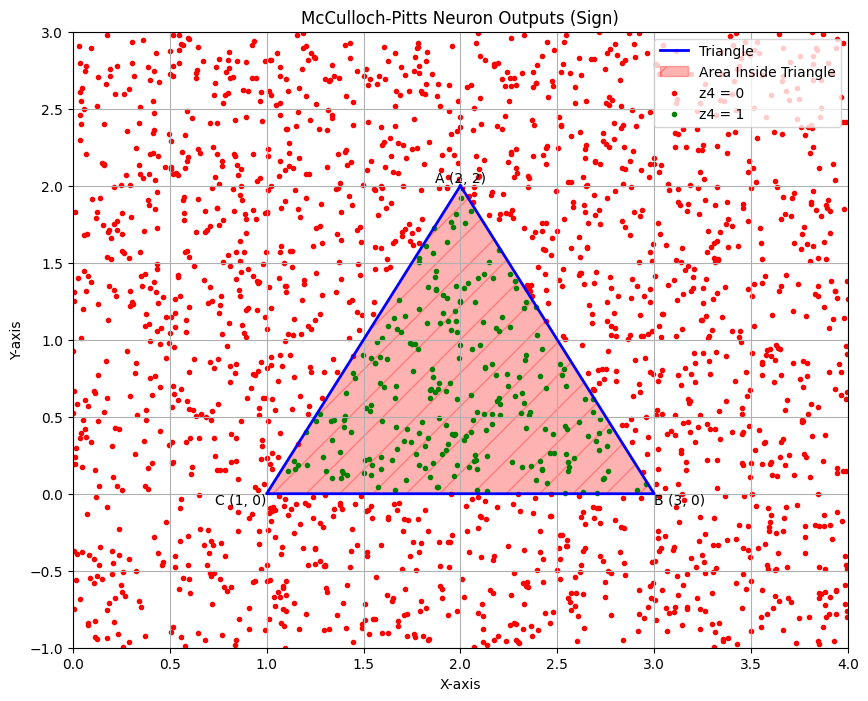

In [ ]:
# Plotting Function for Different Activations
def plot_network_results(activation_function, title_suffix):
    # Generate random data points
    num_points = 2000
    x_values = np.random.uniform(0, 4, num_points)
    y_values = np.random.uniform(-1, 3, num_points)

    # Initialize lists to store data points for different z4 values
    red_points = []
    green_points = []

    # Evaluate data points using the network function
    for i in range(num_points):
        z4_value = network(x_values[i], y_values[i], activation_function)
        if z4_value[0] < 0.5:  # z4 value is 0
            red_points.append((x_values[i], y_values[i]))
        else:  # z4 value is 1
            green_points.append((x_values[i], y_values[i]))

    # Separate x and y values for red and green points
    if red_points:
        red_x, red_y = zip(*red_points)
    else:
        red_x, red_y = [], []

    if green_points:
        green_x, green_y = zip(*green_points)
    else:
        green_x, green_y = [], []

    # Triangle vertices
    x = [2, 3, 1, 2]
    y = [2, 0, 0, 2]

    # Plot the triangle
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, color="blue", label="Triangle", linewidth=2)
    plt.fill(x, y, color="red", alpha=0.3, hatch="/", label="Area Inside Triangle")

    # Adding text labels for the vertices
    plt.text(2, 2, "A (2, 2)", fontsize=10, ha="center", va="bottom")
    plt.text(3, 0, "B (3, 0)", fontsize=10, ha="left", va="top")
    plt.text(1, 0, "C (1, 0)", fontsize=10, ha="right", va="top")

    # Plot classified points
    plt.scatter(red_x, red_y, color="red", label="z4 = 0", marker=".")
    plt.scatter(green_x, green_y, color="green", label="z4 = 1", marker=".")

    # Adding grid, legend, and labels
    plt.grid(True)
    plt.legend(loc="upper right")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(f"McCulloch-Pitts Neuron Outputs ({title_suffix})")

    # Setting the x and y axis limits
    plt.xlim(0, 4)
    plt.ylim(-1, 3)

    # Save plot as PNG
    plt.savefig(f"network_{title_suffix}.png", bbox_inches="tight")
    plt.show()


# Test with Different Activation Functions
activation_functions = {
    "ReLU": relu,
    "ELU": elu,
    "Sigmoid": sigmoid,
    "Sign": sign
}

for name, func in activation_functions.items():
    print(f"Plotting for Activation Function: {name}")
    plot_network_results(func, name)

In [ ]:
import numpy as np
import pandas as pd

# Define the confusion matrix
confusion_matrix = np.array([
    [45,3,2,1],
    [3,32,2,6],
    [2,2,16,10],
    [0,2,0,20]
])
# Define class labels
classes = ['C1', 'C2', 'C3', 'C4']

# Initialize lists for metrics
TP = []
FP = []
TN = []
FN = []
Sensitivity = []
Specificity = []

# Loop through each class to calculate metrics
for i in range(len(classes)):
    tp = confusion_matrix[i, i]  # True Positives
    fp = confusion_matrix[:, i].sum() - tp  # False Positives
    fn = confusion_matrix[i, :].sum() - tp  # False Negatives
    tn = confusion_matrix.sum() - (tp + fp + fn)  # True Negatives

    # Calculate Sensitivity and Specificity
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

    # Append to lists
    TP.append(tp)
    FP.append(fp)
    TN.append(tn)
    FN.append(fn)
    Sensitivity.append(sensitivity)
    Specificity.append(specificity)

# Create a pandas DataFrame
results_df = pd.DataFrame({
    'Class': classes,
    'TP': TP,
    'FP': FP,
    'TN': TN,
    'FN': FN,
    'Sensitivity': Sensitivity,
    'Specificity': Specificity
})

# Display the results
print(results_df)


  Class  TP  FP   TN  FN  Sensitivity  Specificity
0    C1  45   5   90   6     0.882353     0.947368
1    C2  32   7   96  11     0.744186     0.932039
2    C3  16   4  112  14     0.533333     0.965517
3    C4  20  17  107   2     0.909091     0.862903


<div dir=rtl>

## پرسش دوم

</div>

In [ ]:
!pip install opendatasets
import warnings
import opendatasets as od
# Ignore DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Assign the Kaggle data set URL into variable
# Using opendatasets let's download the data sets
dataset = 'https://www.kaggle.com/datasets/aslkuscu/telecust1000t'
#{"username":"mehdimoazedy","key":"34273bbc76081a4f5e3d0b54a221dc70"}
od.download(dataset)

Skipping, found downloaded files in "./telecust1000t" (use force=True to force download)



1. Importing Required Libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim, tensor
import numpy as np
import random

2. Load and Explore Dataset

In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/aslkuscu/telecust1000t
df = pd.read_csv("./telecust1000t/teleCust1000t.csv")
RANDOM_SEED = 73
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Display basic dataset information
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


3. Data Visualization and Correlation Analysis

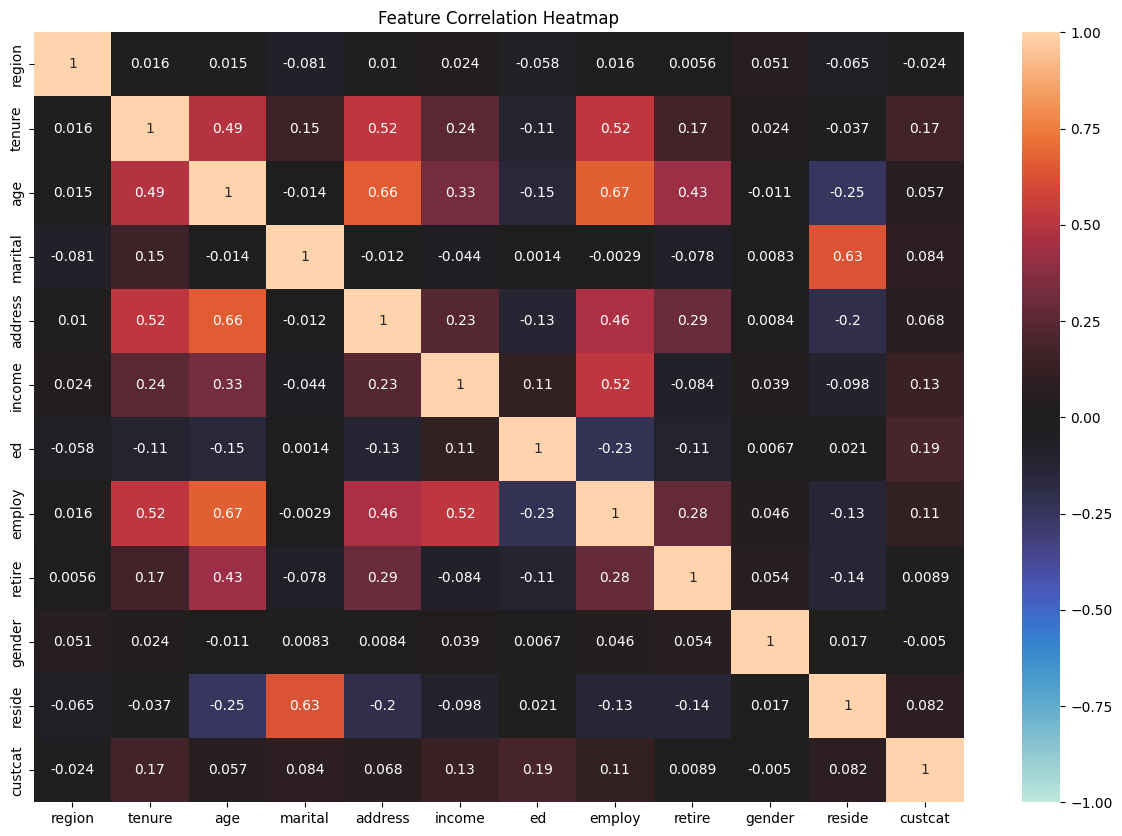

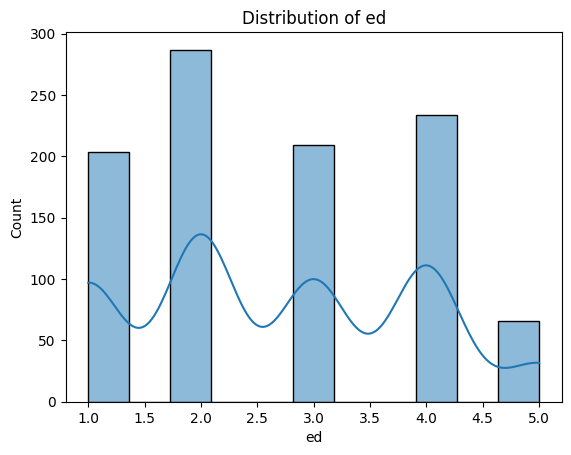

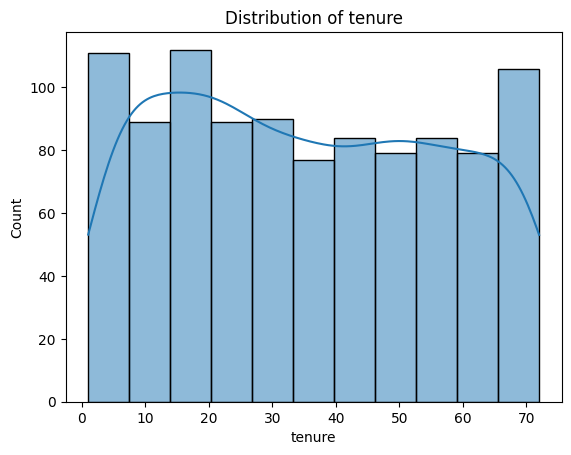

In [ ]:
# Heatmap of feature correlation
dataCorr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(dataCorr, vmin=-1, vmax=1, center=0, annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Plot histograms of two most correlated features with 'custcat'
top_features = dataCorr['custcat'].abs().sort_values(ascending=False).index[1:3]
for feature in top_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


4. Data Preprocessing

In [ ]:
# Separate features and target variable
target = df["custcat"]-1
features = df.drop(["custcat"], axis=1).values.astype(np.float32)

# Normalize data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
target = target.values.reshape(-1, 1)



# Split data into train, test, and validation sets
trainFeatures, testFeatures, trainTargets, testTargets = train_test_split(
    features, target, test_size=0.2, random_state=RANDOM_SEED
)
testFeatures, validFeatures, testTargets, validTargets = train_test_split(
    testFeatures, testTargets, test_size=0.5, random_state=RANDOM_SEED
)

# Convert data to PyTorch tensors
train_features = tensor(trainFeatures,)
valid_features = tensor(validFeatures,)
test_features = tensor(testFeatures,)

train_targets = tensor(trainTargets, dtype=torch.int64).reshape(-1) # Targets should be int64 for CrossEntropyLoss
valid_targets = tensor(validTargets, dtype=torch.int64).reshape(-1)
test_targets = tensor(testTargets, dtype=torch.int64).reshape(-1)



 6. Define and Train Multiple Models

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, learn_rate=0.01, epochs=300, b_size=200):
    torch.manual_seed(RANDOM_SEED)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        for b in range(0, X_train.shape[0], b_size):
            X_batch = X_train[b:b + b_size]
            y_batch = y_train[b:b + b_size]

            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        if epoch % 100 == 0:
          print(f"Epoch {epoch + 1}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.show()
    return model


Epoch 1, Training Loss: 1.4817, Validation Loss: 1.4550
Epoch 101, Training Loss: 1.3893, Validation Loss: 1.3249
Epoch 201, Training Loss: 1.3754, Validation Loss: 1.2957
Epoch 301, Training Loss: 1.3730, Validation Loss: 1.2810
Epoch 401, Training Loss: 1.3715, Validation Loss: 1.2719
Epoch 501, Training Loss: 1.3698, Validation Loss: 1.2641
Epoch 601, Training Loss: 1.3674, Validation Loss: 1.2574
Epoch 701, Training Loss: 1.3622, Validation Loss: 1.2500
Epoch 801, Training Loss: 1.3549, Validation Loss: 1.2436
Epoch 901, Training Loss: 1.3451, Validation Loss: 1.2363
Epoch 1001, Training Loss: 1.3429, Validation Loss: 1.2243
Epoch 1101, Training Loss: 1.3432, Validation Loss: 1.2201
Epoch 1201, Training Loss: 1.3410, Validation Loss: 1.2220
Epoch 1301, Training Loss: 1.3348, Validation Loss: 1.2215
Epoch 1401, Training Loss: 1.3267, Validation Loss: 1.2247
Epoch 1501, Training Loss: 1.3313, Validation Loss: 1.2286
Epoch 1601, Training Loss: 1.3307, Validation Loss: 1.2255
Epoch 170

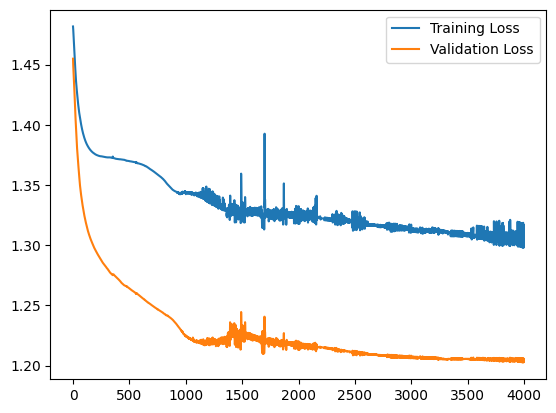

Epoch 1, Training Loss: 1.4975, Validation Loss: 1.4532
Epoch 101, Training Loss: 1.4000, Validation Loss: 1.3854
Epoch 201, Training Loss: 1.3936, Validation Loss: 1.3804
Epoch 301, Training Loss: 1.3919, Validation Loss: 1.3796
Epoch 401, Training Loss: 1.3914, Validation Loss: 1.3794
Epoch 501, Training Loss: 1.3912, Validation Loss: 1.3795
Epoch 601, Training Loss: 1.3912, Validation Loss: 1.3795
Epoch 701, Training Loss: 1.3911, Validation Loss: 1.3795
Epoch 801, Training Loss: 1.3911, Validation Loss: 1.3795
Epoch 901, Training Loss: 1.3911, Validation Loss: 1.3795
Epoch 1001, Training Loss: 1.3912, Validation Loss: 1.3795
Epoch 1101, Training Loss: 1.3912, Validation Loss: 1.3796
Epoch 1201, Training Loss: 1.3912, Validation Loss: 1.3796
Epoch 1301, Training Loss: 1.3912, Validation Loss: 1.3796
Epoch 1401, Training Loss: 1.3913, Validation Loss: 1.3796
Epoch 1501, Training Loss: 1.3913, Validation Loss: 1.3796
Epoch 1601, Training Loss: 1.3913, Validation Loss: 1.3796
Epoch 170

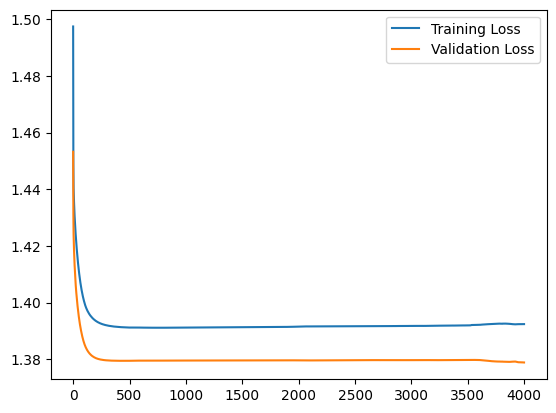

Sequential(
  (0): Linear(in_features=11, out_features=7, bias=True)
  (1): ReLU()
  (2): Linear(in_features=7, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=4, bias=True)
)

In [ ]:
# Model 1: One Hidden Layer
OneLayerModel = nn.Sequential(
    nn.Linear(11, 5),
    nn.ReLU(),
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
)
train_model(OneLayerModel, train_features, train_targets, valid_features, valid_targets, epochs=4000)

# Model 2: Two Hidden Layers
TwoLayerModel = nn.Sequential(
    nn.Linear(11, 7),
    nn.ReLU(),
    nn.Linear(7, 5),
    nn.ReLU(),
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.Linear(3, 4))
train_model(TwoLayerModel, train_features, train_targets, valid_features, valid_targets, epochs=4000)

Epoch 1, Training Loss: 1.4861, Validation Loss: 1.3848
Epoch 101, Training Loss: 1.3755, Validation Loss: 1.2624
Epoch 201, Training Loss: 1.3738, Validation Loss: 1.2486
Epoch 301, Training Loss: 1.3694, Validation Loss: 1.2435


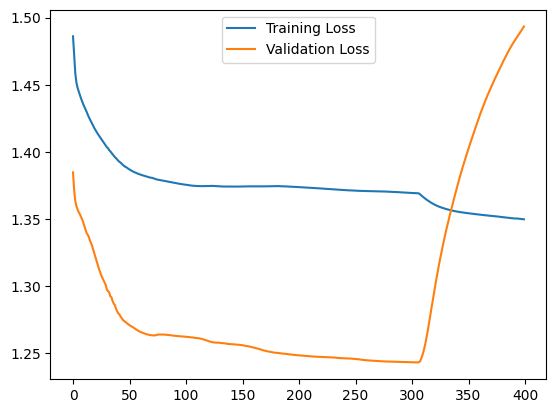

Epoch 1, Training Loss: 1.5969, Validation Loss: 1.5475
Epoch 101, Training Loss: 1.3559, Validation Loss: 1.5736
Epoch 201, Training Loss: 1.3300, Validation Loss: 1.4925
Epoch 301, Training Loss: 1.3357, Validation Loss: 1.4428
Epoch 401, Training Loss: 1.3213, Validation Loss: 1.4085


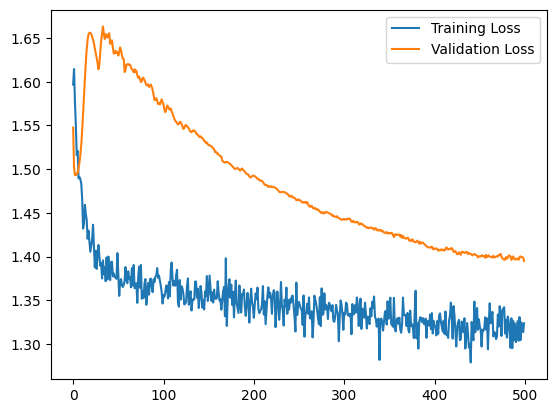

Sequential(
  (0): Linear(in_features=11, out_features=6, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=6, out_features=6, bias=True)
  (4): ReLU()
  (5): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=6, out_features=4, bias=True)
  (7): Dropout(p=0.2, inplace=False)
)

In [ ]:
# Model with Batch Normalization
OneLayerModel_Batchnorm = nn.Sequential(
    nn.Linear(11, 5),
    nn.ReLU(),
    nn.BatchNorm1d(5),
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.BatchNorm1d(3),
    nn.Linear(3, 4),
)
train_model(OneLayerModel_Batchnorm, train_features, train_targets, valid_features, valid_targets, epochs=400)

# Model with Dropout
OneLayerModel_Batchnorm_dropout = nn.Sequential(
    nn.Linear(11, 6),
    nn.ReLU(),
    nn.BatchNorm1d(6),
    nn.Linear(6, 6),
    nn.ReLU(),
    nn.BatchNorm1d(6),
    nn.Linear(6, 4),
    nn.Dropout(p=0.2),
)
train_model(OneLayerModel_Batchnorm_dropout, train_features, train_targets, valid_features, valid_targets, epochs=500)


7. Evaluate the Best Model on Test Data

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        test_loss = nn.CrossEntropyLoss()(y_pred, y_test)

        y_pred_classes = torch.argmax(y_pred, dim=1).numpy()
        y_test_classes = y_test.numpy()

        acc = accuracy_score(y_test_classes, y_pred_classes)

        f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

    print(f"Test Loss: {test_loss.item():.4f}, Accuracy: {acc:.4f}, F1-Score: {f1:.4f}")

models = [OneLayerModel, TwoLayerModel, OneLayerModel_Batchnorm, OneLayerModel_Batchnorm_dropout]
models_names = ["OneLayerModel", "TwoLayerModel", "OneLayerModel_Batchnorm", "OneLayerModel_Batchnorm_dropout"]

model_dict = dict(zip(models_names, models))

for model_name, model in model_dict.items():
    print(f"Model: {model_name}")
    evaluate_model(model, test_features, test_targets)



Model: OneLayerModel
Test Loss: 1.3201, Accuracy: 0.3700, F1-Score: 0.3233
Model: TwoLayerModel
Test Loss: 1.3749, Accuracy: 0.3100, F1-Score: 0.1467
Model: OneLayerModel_Batchnorm
Test Loss: 1.3266, Accuracy: 0.3600, F1-Score: 0.3203
Model: OneLayerModel_Batchnorm_dropout
Test Loss: 1.3217, Accuracy: 0.3300, F1-Score: 0.3253


<div dir=rtl>

## پرسش سوم

</div>

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 18.9MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import random


In [ ]:

# Helper function to add noise to a pattern
def add_noise(pattern, noise_level):
    noisy_pattern = pattern.copy()
    num_noisy = int(noise_level * pattern.size)
    indices = np.random.choice(pattern.size, num_noisy, replace=False)
    noisy_pattern.flat[indices] *= -1
    return noisy_pattern

# Convert image to binary pattern
def convert_image_to_binary(path):
    image = Image.open(path).convert('L')
    image = image.resize((10, 10))  # Resize for simplicity
    binary_pattern = np.array(image)
    binary_pattern = (binary_pattern > 128).astype(int) * 2 - 1
    return binary_pattern

# Save binary pattern as image
def save_binary_image(pattern, path):
    pattern = (pattern + 1) * 127.5  # Scale back to 0-255
    image = Image.fromarray(pattern.astype(np.uint8))
    image.save(path)




In [ ]:

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        '''Train the network using Hebbian learning.'''
        for pattern in patterns:
            pattern = np.array(pattern).flatten()
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)
        self.weights /= len(patterns)

    def recall(self, pattern, steps=10):
        '''Recall a pattern from the network.'''
        pattern = np.array(pattern).flatten()
        for _ in range(steps):
            for i in range(self.num_neurons):
                raw_value = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if raw_value >= 0 else -1
        return pattern.reshape(int(np.sqrt(self.num_neurons)), -1)

    def energy(self, pattern):
        '''Calculate the energy of a given pattern.'''
        pattern = np.array(pattern).flatten()
        return -0.5 * pattern.T @ self.weights @ pattern


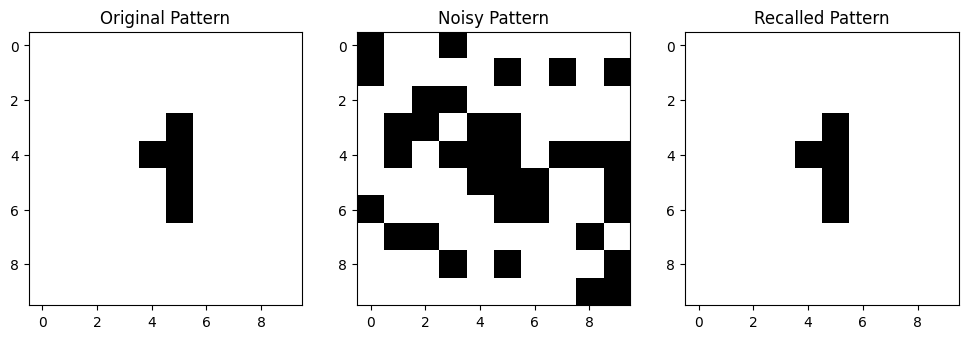

In [ ]:

# Load and convert image to binary
original_pattern = convert_image_to_binary('/content/5.jpg')

# Create Hopfield network
net = HopfieldNetwork(num_neurons=original_pattern.size)
net.train([original_pattern])

# Add noise to the image
noisy_pattern = add_noise(original_pattern, noise_level=0.3)

# Recall the image
recalled_pattern = net.recall(noisy_pattern)

# Save results
save_binary_image(original_pattern, '/content/original.jpg')
save_binary_image(noisy_pattern, '/content/noisy.jpg')
save_binary_image(recalled_pattern, '/content/recalled.jpg')

# Plot results
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(original_pattern, cmap='gray')
axs[0].set_title('Original Pattern')
axs[1].imshow(noisy_pattern, cmap='gray')
axs[1].set_title('Noisy Pattern')
axs[2].imshow(recalled_pattern, cmap='gray')
axs[2].set_title('Recalled Pattern')
plt.show()

In [ ]:
# Helper function to create Point Missing pattern
def add_point_missing(pattern, missing_ratio):
    '''Add point missing noise to the pattern.'''
    missing_pattern = pattern.copy()
    num_missing = int(missing_ratio * pattern.size)
    indices = np.random.choice(pattern.size, num_missing, replace=False)
    missing_pattern.flat[indices] = 0
    return missing_pattern

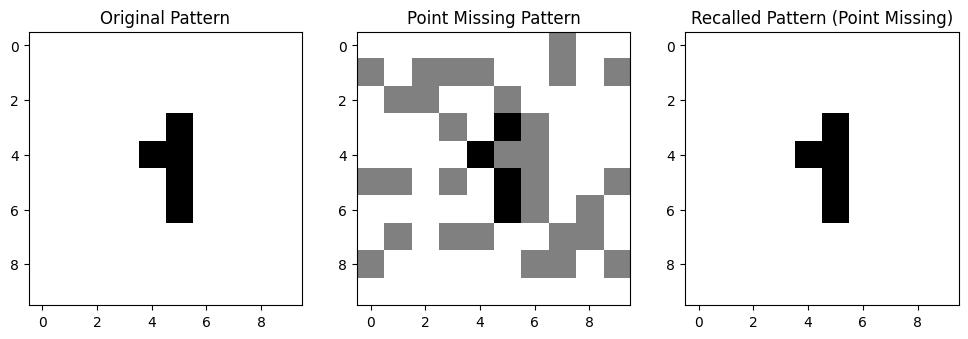

In [ ]:
    original_pattern = convert_image_to_binary('/content/5.jpg')

    # Create Hopfield network
    net = HopfieldNetwork(num_neurons=original_pattern.size)
    net.train([original_pattern])

    # Add Point Missing to the image
    point_missing_pattern = add_point_missing(original_pattern, missing_ratio=0.3)

    # Recall the image
    recalled_pattern_pm = net.recall(point_missing_pattern)

    # Save results
    save_binary_image(original_pattern, '/content/original.jpg')
    save_binary_image(point_missing_pattern, '/content/point_missing.jpg')
    save_binary_image(recalled_pattern_pm, '/content/recalled_point_missing.jpg')

    # Plot results
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(original_pattern, cmap='gray')
    axs[0].set_title('Original Pattern')
    axs[1].imshow(point_missing_pattern, cmap='gray')
    axs[1].set_title('Point Missing Pattern')
    axs[2].imshow(recalled_pattern_pm, cmap='gray')
    axs[2].set_title('Recalled Pattern (Point Missing)')
    plt.show()


<div dir=rtl>

## پرسش چهارم

</div>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from torch import Tensor
from einops import repeat
import torch
import torch.nn as nn
from sklearn.cluster import k_means
# Data Split
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Create a StandardScaler object
scaler = StandardScaler()
# Fit the scaler to the training data and transform it
X = scaler.fit_transform(X)
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=73)
yTest

array([2.388, 1.976, 3.   , ..., 1.576, 3.244, 1.741])

In [ ]:
# RBF Model
class RBF():
    def __init__(self, inFeatures: int, outFeatures: int, nClusters: int) -> None:
        self.inFeatures = inFeatures
        self.outFeatures = outFeatures
        self.nCluster = nClusters
        self.weights = None

        # KMeans
        self.centroids, _, _ = k_means(xTrain, n_clusters = self.nCluster)
        dists = []
        for i in range(self.centroids.shape[0]):
            for j in range(self.centroids.shape[0]):
                if i != j:
                    d = np.linalg.norm(self.centroids[i] - self.centroids[j])
                    dists.append(d)
        dMax = max(dists)
        spread = (dMax ** 2) / (self.nCluster)
        self.scale = -2 * (spread)

    def eucliden(self, X: Tensor, C: Tensor):
        cMat = repeat(C, 'n -> k n', k = X.shape[0])
        diff = torch.norm(X - cMat, dim = 1)
        return diff

    def train(self, X: Tensor, y: Tensor):
        phiList = []
        for c in self.centroids:
            r = self.eucliden(X, c)
            phi = torch.exp(r / self.scale)
            phiList.append(phi.unsqueeze(1).permute(1, 0))
        phiT = torch.cat(phiList) # 2, 2064
        phis = phiT.permute(1, 0) # 2064, 2
        weight = (torch.linalg.inv(phiT @ phis)) @ phiT @ y
        self.weight = torch.tensor(weight)
        print(self.weight.shape)

    def test(self, X: Tensor, y: Tensor):
        phiList = []
        for c in self.centroids:
            r = self.eucliden(X, c)
            phi = torch.exp(r / self.scale)
            phiList.append(phi.unsqueeze(1).permute(1, 0))
        phiT = torch.cat(phiList) # 2, 2064
        phis = phiT.permute(1, 0) # 2064, 2
        yHat = phis @ self.weight
        return yHat




In [ ]:
# Train
RBF_model = RBF(8, 1, 10)
xTrain = torch.from_numpy(xTrain)
xTest = torch.from_numpy(xTest)
yTrain = torch.from_numpy(yTrain)
yTest = torch.from_numpy(yTest)
RBF_model.train(xTrain, yTrain)
ypred_rbf = RBF_model.test(xTest, yTest)


torch.Size([10])


<ipython-input-80-cb85d9c39a89>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.weight = torch.tensor(weight)


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yTest, RBF_model.test(xTest, yTest))

0.6955835321022724

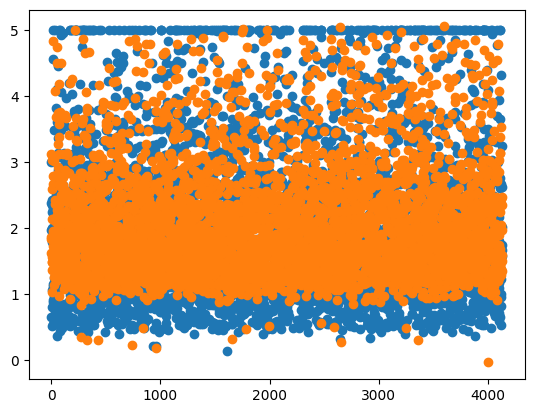

In [ ]:
plt.scatter(range(len(yTest)), yTest)
plt.scatter(range(len(ypred_rbf)), ypred_rbf)
plt.show()

# instead least square lets use adam optimizer
we need nn.module to make use of pytorch adam optimizer so
we must define another RBF class

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Data Preprocessing
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=73)

# Convert to PyTorch tensors
xTrain = torch.tensor(xTrain, dtype=torch.float32)
xTest = torch.tensor(xTest, dtype=torch.float32)
yTrain = torch.tensor(yTrain, dtype=torch.float32).unsqueeze(1)  # Make target 2D
yTest = torch.tensor(yTest, dtype=torch.float32).unsqueeze(1)  # Make target 2D

# RBF Model Definition
class RBF_Adam(nn.Module):
    def __init__(self, inFeatures: int, outFeatures: int, nClusters: int) -> None:
        super(RBF_Adam, self).__init__()
        self.inFeatures = inFeatures
        self.outFeatures = outFeatures
        self.nClusters = nClusters

        # KMeans for centroids
        self.centroids = None  # Will be initialized in fit
        self.scale = None  # Spread parameter will also be initialized

        # Define trainable weights
        self.weights = nn.Parameter(torch.randn(nClusters, outFeatures))
        self.bias = nn.Parameter(torch.randn(outFeatures))

    def fit_kmeans(self, X):
        kmeans = KMeans(n_clusters=self.nClusters)
        kmeans.fit(X)
        self.centroids = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32)

        # Compute spread
        dists = []
        for i in range(self.centroids.shape[0]):
            for j in range(self.centroids.shape[0]):
                if i != j:
                    d = torch.norm(self.centroids[i] - self.centroids[j])
                    dists.append(d)
        dMax = max(dists)
        spread = (dMax ** 2) / (self.nClusters)
        self.scale = -2 * (spread)

    def euclidean(self, X, C):
        # Calculate Euclidean distances
        cMat = C.unsqueeze(0).repeat(X.shape[0], 1, 1)  # Repeat centroids for all samples
        diff = torch.norm(X.unsqueeze(1) - cMat, dim=2)
        return diff

    def rbf_activation(self, X):
        distances = self.euclidean(X, self.centroids)
        phi = torch.exp(distances / self.scale)
        return phi

    def forward(self, X):
        phi = self.rbf_activation(X)
        output = phi @ self.weights + self.bias
        return output

# Model Initialization
model = RBF_Adam(inFeatures=xTrain.shape[1], outFeatures=1, nClusters=10)
model.fit_kmeans(xTrain)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training Loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(xTrain)
    loss = criterion(outputs, yTrain)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation on Test Set
model.eval()
with torch.no_grad():
    yPred = model(xTest)
    test_loss = criterion(yPred, yTest)
    print(f"Test Loss: {test_loss.item():.4f}")


Epoch [10/100], Loss: 2.7630
Epoch [20/100], Loss: 3.4783
Epoch [30/100], Loss: 2.6932
Epoch [40/100], Loss: 1.3529
Epoch [50/100], Loss: 1.4042
Epoch [60/100], Loss: 1.3999
Epoch [70/100], Loss: 1.3460
Epoch [80/100], Loss: 1.3276
Epoch [90/100], Loss: 1.3255
Epoch [100/100], Loss: 1.3257
Test Loss: 1.3560


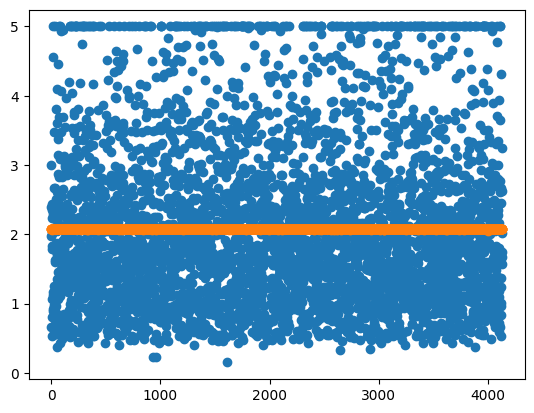

In [ ]:
ypred = model(xTest)
plt.scatter(range(len(yTest)), yTest)
plt.scatter(range(len(ypred)), ypred.detach().numpy())
plt.show()

Epoch [10/100], Loss: 0.8898
Epoch [20/100], Loss: 0.6961
Epoch [30/100], Loss: 0.5368
Epoch [40/100], Loss: 0.4587
Epoch [50/100], Loss: 0.4154
Epoch [60/100], Loss: 0.3943
Epoch [70/100], Loss: 0.3801
Epoch [80/100], Loss: 0.3711
Epoch [90/100], Loss: 0.3637
Epoch [100/100], Loss: 0.3573
Dense Model Test Loss: 0.3796


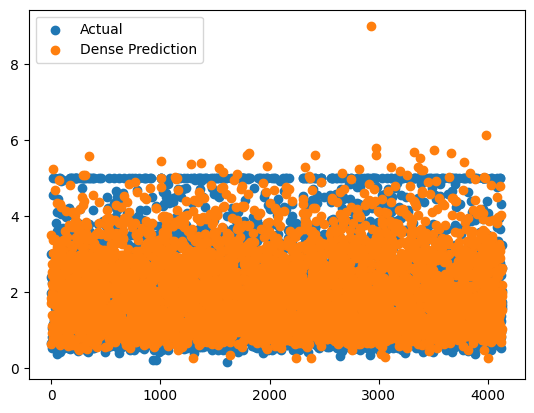

In [ ]:
class DenseNN(nn.Module):
    def __init__(self, input_dim):
        super(DenseNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)  # لایه اول Dense با 64 نورون
        self.fc2 = nn.Linear(64, 32)         # لایه دوم Dense با 32 نورون
        self.fc3 = nn.Linear(32, 1)          # خروجی

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# مقداردهی اولیه مدل
dense_model = DenseNN(input_dim=xTrain.shape[1])

# تعریف تابع خطا و بهینه‌ساز
criterion = nn.MSELoss()
optimizer = optim.Adam(dense_model.parameters(), lr=0.01)

epochs = 100
for epoch in range(epochs):
    dense_model.train()
    optimizer.zero_grad()
    outputs = dense_model(xTrain)
    loss = criterion(outputs, yTrain)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

dense_model.eval()
with torch.no_grad():
    yPred_dense = dense_model(xTest)
    dense_test_loss = criterion(yPred_dense, yTest)
    print(f"Dense Model Test Loss: {dense_test_loss.item():.4f}")

plt.scatter(range(len(yTest)), yTest, label='Actual')
plt.scatter(range(len(yPred_dense)), yPred_dense.detach().numpy(), label='Dense Prediction')
plt.legend()
plt.show()

RBF Model Test MSE: 0.6956
Dense Model Test MSE: 0.3796


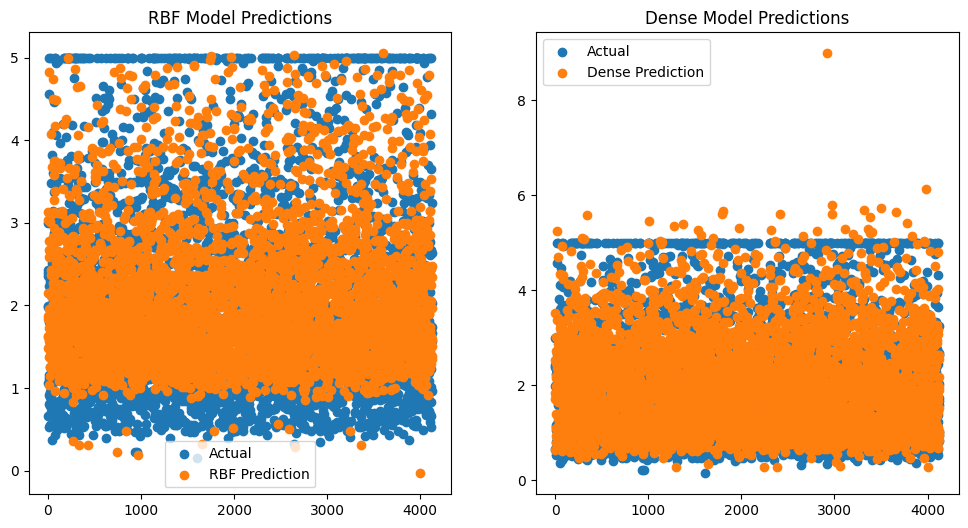

In [ ]:
# محاسبه خطاها
from sklearn.metrics import mean_squared_error

# خطای RBF
ypred_rbf=ypred_rbf.detach().numpy()
mse_rbf = mean_squared_error(yTest.numpy(), ypred_rbf)

# خطای Dense
yPred_dense = dense_model(xTest).detach().numpy()
mse_dense = mean_squared_error(yTest.numpy(), yPred_dense)

# نمایش نتایج
print(f"RBF Model Test MSE: {mse_rbf:.4f}")
print(f"Dense Model Test MSE: {mse_dense:.4f}")

# مقایسه بصری
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('RBF Model Predictions')
plt.scatter(range(len(yTest)), yTest, label='Actual')
plt.scatter(range(len(ypred_rbf)), ypred_rbf, label='RBF Prediction')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Dense Model Predictions')
plt.scatter(range(len(yTest)), yTest, label='Actual')
plt.scatter(range(len(yPred_dense)), yPred_dense, label='Dense Prediction')
plt.legend()
plt.show()
